In [1]:

!pip install numpy scikit-learn opencv-python
import os
from skimage.feature import hog
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

dataset_path = '/content/drive/MyDrive/prodigy/train'





In [2]:
# Lists to store images and corresponding labels
feature_vectors = []
labels = []

# Iterate through categories in the dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Skip non-directory entries
    if not os.path.isdir(category_path):
        continue

    # Iterate through image files in the category
    for file_name in os.listdir(category_path):
        image_path = os.path.join(category_path, file_name)

        # Skip non-file entries
        if not os.path.isfile(image_path):
            continue

        # Read, convert to grayscale, and resize the image
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray_image, (64, 64))

        # Extract HOG features from the image
        features, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

        # Append features and label to lists
        feature_vectors.append(features)
        labels.append(category)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'images' and 'labels' are defined
X = np.array(images)
y = np.array(labels)

# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Flatten the images
X_flatten = X.reshape(X.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

# Debug: Print the shape of the training set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Create an SVM model
svm_model = SVC(random_state=42, probability=True)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)

# Debug: Print progress message
print("Fitting the model...")

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Debug: Print completion message
print("Model fitting complete.")

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


X_train shape: (2838, 1764)
y_train shape: (2838,)
Fitting the model...
Model fitting complete.
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.7535211267605634
              precision    recall  f1-score   support

         cat       0.78      0.80      0.79       404
         dog       0.72      0.70      0.71       306

    accuracy                           0.75       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.75      0.75      0.75       710



In [6]:
import cv2
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt


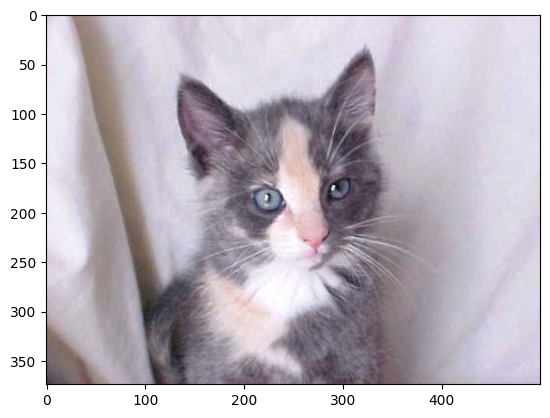

Predicted Label: ['cats']


In [5]:
# Function to preprocess an image for prediction
def preprocess_image_for_prediction(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = resize(gray_image, (64, 64))

    features, _ = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    features_flattened = features.flatten()

    return features_flattened

# Example usage of the preprocess function
test_image_path = '/content/drive/MyDrive/prodigy/test/52.jpg'
preprocessed_image_for_prediction = preprocess_image_for_prediction(test_image_path)

# Display the original image
img = imread(test_image_path)
plt.imshow(img)
plt.show()

# Reshape the preprocessed image for prediction
reshaped_image_for_prediction = preprocessed_image_for_prediction.reshape(1, -1)

# Make a prediction using the trained SVM model
predicted_label = grid_search.predict(reshaped_image_for_prediction)
print("Predicted Label:", predicted_label)